In [91]:
def getNWW3(date,PlotParTime=(0,0)):
    
    '''
    Extract and plot NWW3 Model Data
    
    Input date format: 
    YYYYMMDD
    
    PlotParTime format:
    (wave parameter, time)
        
    Wave parameters:
    dirpwsfc
    dirswsfc
    htsgwsfc
    perpwsfc
    perswsfc
    ugrdsfc
    vgrdsfc
    wdirsfc
    windsfc
    wvdirsfc
    wvpersfc
    
    time size = 61
    
    References:
    https://polar.ncep.noaa.gov/waves/examples/usingpython.shtml
    http://xarray.pydata.org/en/stable/plotting.html
    '''
    
    import xarray as xr
    
    
    url = 'https://nomads.ncep.noaa.gov/dods/wave/nww3/nww3'+date+'/nww3'+date+'_00z'
    
    try:
        ds = xr.open_dataset(url) # create xarray dataset
        
        if PlotParTime: # plot wave parameter

            import cartopy.crs as ccrs
            import matplotlib.pyplot as plt
            
            fig = plt.figure(figsize=(10,6)) 
            ax  = plt.subplot(projection=ccrs.PlateCarree())
            
            par,time = PlotParTime

   
            ds[par].isel(time=time).plot(cbar_kwargs=dict(orientation='horizontal',
                                                pad=0.15, 
                                                shrink=.5),
                                                ax=ax) 
        

            
        return ds
        
    except Exception as e: 
        return print(e,'\nInput date format: YYYYMMDD') # catch error
    
    
    

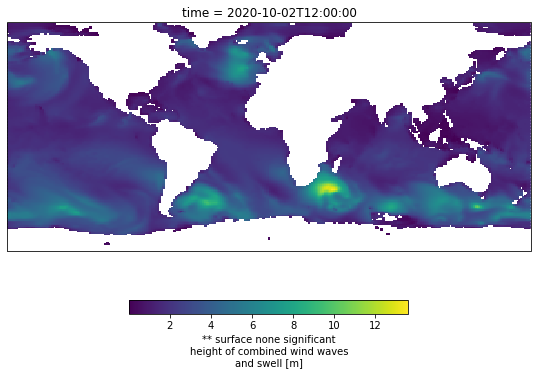

In [97]:
date = '20200925' 
ds   = getNWW3(date,plotParameter=('htsgwsfc',60))

In [98]:
ds = getNWW3(date,plotParameter=None)
ds

<xarray.Dataset>
Dimensions:   (lat: 157, lon: 288, time: 61)
Coordinates:
  * time      (time) datetime64[ns] 2020-09-25 ... 2020-10-02T12:00:00
  * lat       (lat) float64 -78.0 -77.0 -76.0 -75.0 ... 75.0 76.0 77.0 78.0
  * lon       (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    dirpwsfc  (time, lat, lon) float32 ...
    dirswsfc  (time, lat, lon) float32 ...
    htsgwsfc  (time, lat, lon) float32 ...
    perpwsfc  (time, lat, lon) float32 ...
    perswsfc  (time, lat, lon) float32 ...
    ugrdsfc   (time, lat, lon) float32 ...
    vgrdsfc   (time, lat, lon) float32 ...
    wdirsfc   (time, lat, lon) float32 ...
    windsfc   (time, lat, lon) float32 ...
    wvdirsfc  (time, lat, lon) float32 ...
    wvpersfc  (time, lat, lon) float32 ...
Attributes:
    title:        WAVE_nww3 Global wave model fcst from 00Z25sep2020, downloa...
    Conventions:  COARDS\nGrADS
    dataType:     Grid
    history:      Fri Sep 25 20:41:07 UTC 2020 : imported by GrADS Data Serve...

In [99]:
ds = getNWW3('21200925',plotParameter=None)

[Errno -70] NetCDF: DAP server error: b'https://nomads.ncep.noaa.gov/dods/wave/nww3/nww321200925/nww321200925_00z' 
Input date format: YYYYMMDD
